# 1 biến 

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class LogisticModel:
    def __init__(self,X, y, y_pred=None,num_iters=100,lr=0.001):
        self.X = X
        self.y = y
        self.weight = np.zeros(X.shape[-1]).reshape(-1,1)
        self.lr = lr
        self.num_iters = num_iters
        self.loss = np.zeros((num_iters,1))
        self.y_predict = np.zeros((X.shape[0],1))

    # hàm sigmoid
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def forward(self):
        return self.sigmoid(np.dot(self.X, self.weight))

    # đạo hàm theo w0
    def derative_0(self):
        return np.sum(self.forward()-self.y) 

    # đạo hàm theo w1
    def derative_1(self):
        return np.sum(np.dot(self.X[:,1].reshape(-1),self.forward()-self.y))
 
    # hàm gradient_descend cập nhật giá trị dữ liệu cho w 
    def gradient_descend(self):

        for i in range(1, self.num_iters):  
            # cập nhật losss
            self.loss[i] = -np.sum(np.multiply(self.y, np.log(self.forward())) + np.multiply(1-y, np.log(1-self.forward())))
            # cập nhật weight
            self.weight[0] -= self.lr * self.derative_0()
            self.weight[1] -= self.lr * self.derative_1() 
 
        # Vẽ đường phân cách.  
        print(self.weight)  
        xx = np.linspace(-1, 3, 300)
        threshold = -self.weight[0]/self.weight[1]
        yy = self.sigmoid(self.weight[0] + self.weight[1]*xx)
        plt.axis([-2, 5, -1, 2])
        plt.plot(xx, yy, 'g-', linewidth = 2)
        plt.plot(threshold, .5, 'y^', markersize = 8)
        plt.show()


    mức lương (triệu)  kinh nghiệm (năm)  cho vay
0                1.00               10.0      1.0
1                2.00                5.0      1.0
2                1.80                6.0      1.0
3                1.00                7.0      1.0
4                2.00                8.0      1.0
5                0.50                9.0      1.0
6                3.00                4.0      1.0
7                2.50                5.0      1.0
8                1.00                8.0      1.0
9                2.50                4.0      1.0
10               0.10                8.0      0.0
11               0.15                7.0      0.0
12               1.00                4.0      0.0
13               0.80                5.0      0.0
14               2.00                7.0      1.0
15               1.00                4.0      0.0
16               1.50                7.0      1.0
17               1.30                6.0      1.0
18               0.20                7.0      0.0


TypeError: 'str' object is not callable

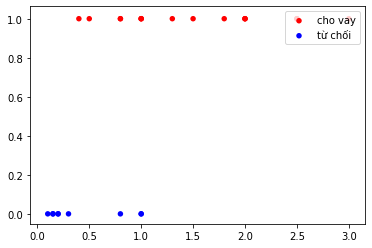

In [111]:

def tablle(x,x1,y): 
    data = dict()   
    data['mức lương (triệu)'] = x1
    data['kinh nghiệm (năm)'] = x
    data['cho vay'] = y
    df = pd.DataFrame(data)
    
    
    print(df.head(20))
if __name__ == '__main__': 
    # Load data từ file csv: tiền lương và mức kinh nghiệm quyết định có được vay hay không
    data = pd.read_csv('logistic.csv').values
    N, d = data.shape
    # dư liệu tiền lương và kinh nghiệm 
    x = data[:, 1].reshape(-1, 1)
    # dữ liệu cho vay hay không 0 là không cho, 1 là cho vay 
    y = data[:, 2].reshape(-1, 1)

    x_cho_vay = x[y[:,0]==1]
    x_tu_choi = x[y[:,0]==0] 
    # Vẽ data bằng scatter  
    plt.scatter(x_cho_vay[:, 0], y_cho_vay, c='red', edgecolors='none', s=30, label='cho vay')
    plt.scatter(x_tu_choi[:, 0], y_tu_choi, c='blue', edgecolors='none', s=30, label='từ chối')
    tablle(data[:, 0],data[:, 1],data[:, 2])
    plt.legend(loc=1)
    plt.ylabel('cho vay ?')
    plt.xlabel('kinh nghiệm (năm)')
 
    # thêm 1 cột giá trị 1 vào đằng trước để nhân với w0 tiện tính toán thay vì phải tính bằng tay
    # ta tính bằng vector
    x = np.hstack((np.ones((N, 1)), x))

    # thực hiện model với lr là 0.01 và số vòng 10000
    model = LogisticModel(X=x,y=y,lr=0.01,num_iters = 10000)
    model.gradient_descend()



# 2 biến 

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class LogisticModel:
    def __init__(self,X, y, y_pred=None,num_iters=100,lr=0.001):
        self.X = X
        self.y = y
        self.weight = np.zeros(X.shape[-1]).reshape(-1,1)
        self.lr = lr
        self.num_iters = num_iters
        self.loss = np.zeros((num_iters,1))
        self.y_predict = np.zeros((X.shape[0],1))

    # hàm sigmoid
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def forward(self):
        return self.sigmoid(np.dot(self.X, self.weight))

    # đạo hàm theo w0
    def derative_0(self):
        return np.sum(self.forward()-self.y) 

    # đạo hàm theo w1
    def derative_1(self):
        return np.sum(np.dot(self.X[:,1].reshape(-1),self.forward()-self.y))

    # đạo hàm theo w2
    def derative_2(self):
        return np.sum(np.dot(self.X[:,2].reshape(-1),self.forward()-self.y)) 

    # hàm gradient_descend cập nhật giá trị dữ liệu cho w 
    def gradient_descend(self):

        for i in range(1, self.num_iters):  
            # cập nhật losss
            self.loss[i] = -np.sum(np.multiply(self.y, np.log(self.forward())) +
                                   np.multiply(1-y, np.log(1-self.forward())))
            # cập nhật weight
            self.weight[0] -= self.lr * self.derative_0()
            self.weight[1] -= self.lr * self.derative_1()
            self.weight[2] -= self.lr * self.derative_2()
 
        # Vẽ đường phân cách.  
        print(self.weight)
        t = 0.5 
        plt.plot((4, 10),(-(self.weight[0]+4*self.weight[1]+ np.log(1/t-1))/self.weight[2], -(self.weight[0] + 10*self.weight[1]+ np.log(1/t-1))/self.weight[2]), 'g')
        plt.show()
        print(self.loss)
        plt.plot(np.linspace(start=1,stop=10000,num=9999),self.loss[1:],'r-') 
        plt.show()


[[-20.0207961 ]
 [  2.05141189]
 [  9.84250364]]


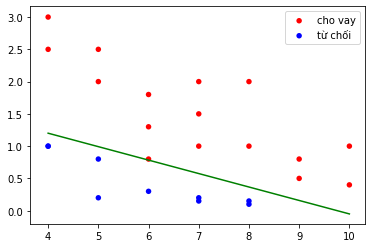

[[ 0.        ]
 [17.32867951]
 [19.02575762]
 ...
 [ 1.31870241]
 [ 1.31864529]
 [ 1.31858817]]


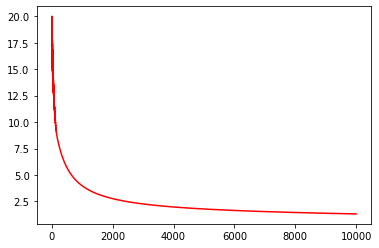

In [115]:

if __name__ == '__main__': 
    # Load data từ file csv: tiền lương và mức kinh nghiệm quyết định có được vay hay không
    data = pd.read_csv('logistic.csv').values
    N, d = data.shape
    # dư liệu tiền lương và kinh nghiệm 
    x = data[:, 0:d-1].reshape(-1, d-1)
    # dữ liệu cho vay hay không 0 là không cho, 1 là cho vay 
    y = data[:, 2].reshape(-1, 1)

    # Vẽ data bằng scatter
    # tách x được vay, và không được vay để vẽ hình  
    x_cho_vay = x[y[:,0]==1]
    x_tu_choi = x[y[:,0]==0]

    plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
    plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
    plt.legend(loc=1)
#     plt.xlabel('mức lương (triệu)')
#     plt.ylabel('kinh nghiệm (năm)')
 
    # thêm 1 cột giá trị 1 vào đằng trước để nhân với w0 tiện tính toán thay vì phải tính bằng tay
    # ta tính bằng vector
    x = np.hstack((np.ones((N, 1)), x))

    # thực hiện model với lr là 0.01 và số vòng 10000
    model = LogisticModel(X=x,y=y,lr=0.01,num_iters = 10000)
    model.gradient_descend()



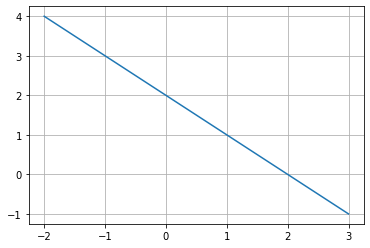

In [114]:

 
x = np.linspace(-2,3,50)
y = -x + 2
plt.grid()
plt.plot(x,y)
